START HERE

In [2]:
# 

import os
import cv2
import numpy as np

# Define the paths to the labeled data folders (without resize_images call)
data_folders = [
    'Data_collected/Labeled_data/A',
    'Data_collected/Labeled_data/B',
    'Data_collected/Labeled_data/C',
    'Data_collected/Labeled_data/E',
    'Data_collected/Labeled_data/F',
    'Data_collected/Labeled_data/G',
    'Data_collected/Labeled_data/H',
    'Data_collected/Labeled_data/I',
    'Data_collected/Labeled_data/J',
    'Data_collected/Labeled_data/K',
    'Data_collected/Labeled_data/L',
    'Data_collected/Labeled_data/M',
    'Data_collected/Labeled_data/N',
    'Data_collected/Labeled_data/O',
    'Data_collected/Labeled_data/P',
    'Data_collected/Labeled_data/Q',
    'Data_collected/Labeled_data/R',
    'Data_collected/Labeled_data/S',
    'Data_collected/Labeled_data/T',
    'Data_collected/Labeled_data/U',
    'Data_collected/Labeled_data/Y',
    'Data_collected/Labeled_data/KEA U RAPELA',
    'Data_collected/Labeled_data/KEA U RATA',
    'Data_collected/Labeled_data/SPACE',
    'Data_collected/Labeled_data/HO BAPALA',
    'Data_collected/Labeled_data/HO LOKILE'
]



print(len(data_folders))


# Initialize lists to store images and labels
images = []
labels = []

# Map folder names to numerical labels
label_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'J': 8,
    'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 
    'S': 17, 'T': 18, 'U': 19, 'Y': 20, 'KEA U RAPELA': 21, 'KEA U RATA': 22, 
    'SPACE': 23, 'HO BAPALA': 24, 'HO LOKILE': 25
}

# Load images and labels
for folder in data_folders:
    label = os.path.basename(folder)  # Get the folder name (A, B, C, etc.)

    # if folder == 'Data_collected/Labeled_data/SPACE':
    #     for i in os.listdir(folder):
    #         print(i)
    if label in label_mapping:  # Ensure the folder name is in the label mapping
        for filename in os.listdir(folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img_resized = cv2.resize(img, (100, 100))  # Resize image to 100x100
                    img_normalized = img_resized / 255.0  # Normalize pixel values
                    images.append(img_normalized)  # Append the image to the list
                    labels.append(label_mapping[label])  # Append the corresponding label

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with labels: {labels}")


26
Loaded 2575 images with labels: [ 0  0  0 ... 25 25 25]


In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the datasets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (1802, 100, 100, 3), Validation set: (386, 100, 100, 3), Test set: (387, 100, 100, 3)


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():

    # Creating Sequential model
    model = models.Sequential([

        # Adding a 2D convolutional layer with 32 filters of size 3x3.
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Indroducing non-linearity using  relu activation function
        # Another 2D convolutional layer is added with 64 filters of size 3x3.
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Another 2D convolutional layer is added with 128 filters of size 3x3.
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten the 3D output from the last convolutional layer into 
        # a 1D vector so that it can be passed into the fully connected (dense) layers.
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularization to prevent overfitting
        layers.Dense(26, activation='softmax')  # For 23 classes (A, B, C, ...)
    ])
    
    return model

# Instantiate the model
model = create_model()


C:\Users\Mulane Taaibosch\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',  # for one-hot labels
              metrics=['accuracy'])

print(model)

<Sequential name=sequential, built=True>


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,130 (6.62 MB)

 Trainable params: 1,735,130 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,  # Setting the number of epochs
                    batch_size=32)  # Set batch size


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.1547 - loss: 2.9650 - val_accuracy: 0.8316 - val_loss: 0.6591
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.7072 - loss: 1.0082 - val_accuracy: 0.9767 - val_loss: 0.1441
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 378ms/step - accuracy: 0.8945 - loss: 0.3598 - val_accuracy: 0.9819 - val_loss: 0.0939
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 384ms/step - accuracy: 0.9239 - loss: 0.2310 - val_accuracy: 0.9896 - val_loss: 0.0423
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.9360 - loss: 0.1823 - val_accuracy: 0.9870 - val_loss: 0.0497
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - accuracy: 0.9670 - loss: 0.1213 - val_accuracy: 0.9922 - val_loss: 0.0296
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - accuracy: 0.9606 - loss: 0.1328 - val_accuracy: 0.9922 - val_loss: 0.0350
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.9580 - loss: 0.1373 - val_accu

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 1.0000 - loss: 6.5697e-04
Test accuracy: 1.0000, Test loss: 0.0007


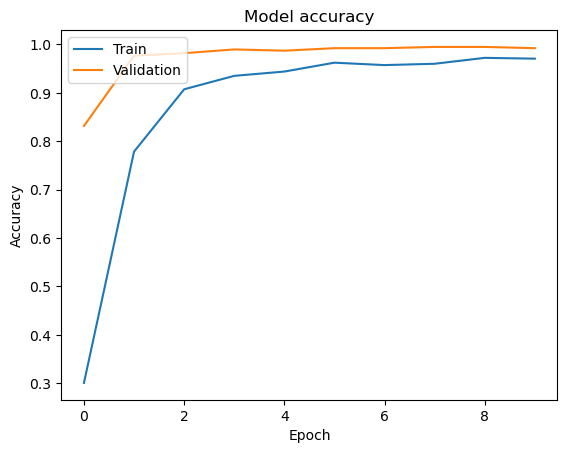

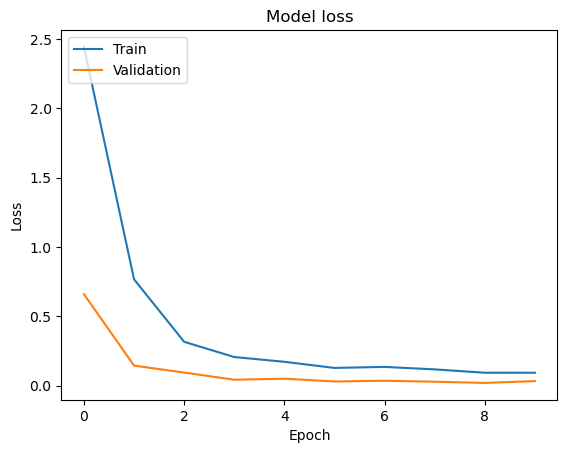

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [10]:
model.save('Sesotho recognition Model.keras') # saving model for future use


MODEL TESTING

In [11]:
import cv2
import numpy as np
import tensorflow as tf
import time
from cvzone.HandTrackingModule import HandDetector

# Load the pre-trained model
model = tf.keras.models.load_model('sesotho phrases.keras')

# Initialize hand detector
detector = HandDetector(maxHands=2)

# Set parameters
image_size = 100  # The size to which images were resized during training
offset = 20       # Offset for cropping the hand region

# Start video capture from webcam
video_cap = cv2.VideoCapture(0)

# Initialize an empty string to store the constructed word
constructed_word = ""
stored_word = ""  # Variable to store the final constructed word

gesture_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'E', 4: 'F', 5: 'G', 6: 'H', 7: 'I', 8: 'J', 9: 'K',
    10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 
    19: 'U', 20: 'Y', 21: 'KEA U RAPELA', 22: 'KEA U RATA', 23: 'SPACE'
}

# Timer for controlling gesture detection intervals
last_detection_time = time.time()
detection_interval = 5  # Set the detection interval to 5 seconds

# Initial delay before starting gesture detection
print("Starting gesture detection in 5 seconds...")
time.sleep(5)


try:
    print("The video has started")
    while True:
        success, image = video_cap.read()
        if not success:
            break
        
        # Detect hand(s) in the video frame
        hands, image = detector.findHands(image)

        # Get the current time
        current_time = time.time()

        # Making delay between alphabets
        if hands and (current_time - last_detection_time >= detection_interval):
            # Update the last detection time
            last_detection_time = current_time

            hand = hands[0]
            x, y, w, h = hand['bbox']  # Get the bounding box of the hand

            # Prepare a white background for the hand image
            image_white = np.ones((image_size, image_size, 3), np.uint8) * 255

            # Crop the hand region from the image
            image_crop = image[y - offset: y + h + offset, x - offset: x + w + offset]

            # Check the aspect ratio of the hand to resize appropriately
            aspect_ratio = h / w

            if aspect_ratio > 1:
                constant = image_size / h
                width_calculated = int(constant * w)
                image_resize = cv2.resize(image_crop, (width_calculated, image_size))
                width_gap = (image_size - width_calculated) // 2
                image_white[:, width_gap: width_gap + width_calculated] = image_resize
            else:
                constant = image_size / w
                height_calculated = int(constant * h)
                image_resize = cv2.resize(image_crop, (image_size, height_calculated))
                height_gap = (image_size - height_calculated) // 2
                image_white[height_gap: height_gap + height_calculated, :] = image_resize

            # Normalize the image as done in training
            image_white_normalized = image_white / 255.0

            # Add a batch dimension (since the model expects batches of inputs)
            image_input = np.expand_dims(image_white_normalized, axis=0)

            # Make a prediction
            prediction = model.predict(image_input)
            predicted_class = np.argmax(prediction, axis=1)[0]  # Get the index of the highest probability

            # Map predicted class index back to corresponding gesture
            predicted_gesture = gesture_mapping.get(predicted_class, "Unknown")
            time.sleep(3)

            # Append the predicted gesture to the constructed word
            constructed_word += predicted_gesture

            # Output the constructed word to the console without breaking the line
            print(f"\rConstructed Word: {constructed_word}", end="")

            # Optionally, display the cropped hand and white background for verification
            cv2.imshow("ImageCrop", image_crop)
            cv2.imshow("ImageWhite", image_white)

        # Show the webcam feed (optional)
        if cv2.imshow("Video", image):
            print("starting video feed")

        # Exit loop when 'q' is pressed
        key = cv2.waitKey(1)
        if key == ord('q'):
            # Store the constructed word into stored_word before quitting
            stored_word = constructed_word

            # Save the final word into a file
            with open('stored_text_gestures/stored_words.txt', 'w') as f:
                f.write(stored_word)
            print(f"\nFinal Constructed Word: {stored_word}")
            break

    # Release video capture and close windows
    video_cap.release()
    cv2.destroyAllWindows()
except():
    print("The video did not start")





KeyboardInterrupt



CONVERETING STORED WORD TO SPEECH

CONVERTING TO VIDEO

In [6]:
import os
word = 'KEA U RATA'


if os.path.exists(main_folder):
    print("Path exists")

Path exists
